### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys
import os
import seaborn as sns
import os
import shutil
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], ".."))
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()

### Run III 2024

In [2]:
# Define study
STUDY_NAME = "optics_tune_2024"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)

df

name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.310        collider_00                             4.656   
      62.306 60.311        collider_00                             5.469   
      62.307 60.312        collider_00                             5.625   
      62.308 60.313        collider_00                             5.625   
      62.309 60.314        collider_00                             5.594   
...                                ...                               ...   
      62.325 60.330        collider_26                             3.719   
      62.326 60.331        collider_26                             3.375   
      62.327 60.332        collider_26                             3.031   
      62.328 60.333        collider_26                             2.594   
      62.329 60.334        collider_26                             2.156   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.310  62.305  60.310  15.0  15.0       411.0       410.0   
      62.306 60.311  62.306  60.311  15.0  15.0       411.0       410.0   
      62.307 60.312  62.307  60.312  15.0  15.0       411.0       410.0   
      62.308 60.313  62.308  60.313  15.0  15.0       411.0       410.0   
      62.309 60.314  62.309  60.314  15.0  15.0       411.0       410.0   
...                     ...     ...   ...   ...         ...         ...   
      62.325 60.330  62.325  60.330  15.0  15.0       411.0       410.0   
      62.326 60.331  62.326  60.331  15.0  15.0       411.0       410.0   
      62.327 60.332  62.327  60.332  15.0  15.0       411.0       410.0   
      62.328 60.333  62.328  60.333  15.0  15.0       411.0       410.0   
      62.329 60.334  62.329  60.334  15.0  15.0       411.0       410.0   

                     num_particles_per_bunch  
beam  qx     qy                               
lhcb1 62.305 60.310             1.150000e+11  
      62.306 60.311             1.150000e+11  
      62.307 60.312             1.150000e+11  
      62.308 60.313             1.150000e+11  
      62.309 60.314             1.150000e+11  
...                                      ...  
      62.325 60.330             1.150000e+11  
      62.326 60.331             1.150000e+11  
      62.327 60.332             1.150000e+11  
      62.328 60.333             1.150000e+11  
      62.329 60.334             1.150000e+11  

[674 rows x 9 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(
    index="qx", columns="name base collider", values="normalized amplitude in xy-plane"
)
df_to_plot

name base collider,collider_00,collider_01,collider_02,collider_03,collider_04,collider_05,collider_06,collider_07,collider_08,collider_09,...,collider_17,collider_18,collider_19,collider_20,collider_21,collider_22,collider_23,collider_24,collider_25,collider_26
qx,,,,,,,,,,,,,,,,,,,,,
62.305,4.656,4.188,4.500,3.906,3.562,3.812,3.812,3.938,4.062,3.750,...,3.375,3.500,3.594,3.656,3.750,3.844,3.656,3.719,3.719,3.656
62.306,5.469,5.500,5.594,5.844,5.312,5.094,5.000,4.938,5.219,5.719,...,3.812,3.594,3.594,3.531,3.812,3.688,3.719,3.688,3.906,3.750
62.307,5.625,5.312,5.688,5.062,5.250,5.406,5.562,5.344,5.562,5.062,...,5.250,5.375,4.500,4.062,3.719,3.688,3.625,3.969,3.750,3.844
62.308,5.625,5.344,5.344,6.000,5.594,5.188,5.688,5.312,5.250,5.250,...,5.438,5.500,4.938,5.531,5.188,4.094,3.906,3.531,3.750,3.719
62.309,5.594,5.438,5.781,5.438,5.062,5.781,5.219,5.469,5.438,4.781,...,5.344,5.469,5.125,5.594,5.625,5.906,5.531,3.812,3.844,3.906
62.310,5.469,5.188,5.688,5.406,5.469,5.500,5.406,5.531,5.406,5.594,...,5.531,5.312,5.500,5.219,5.906,5.781,5.531,5.438,5.219,4.219
62.311,5.594,5.156,6.562,5.875,6.094,5.656,5.500,5.750,5.531,5.750,...,5.844,5.500,5.594,5.688,5.656,5.438,5.562,5.562,5.219,5.594
62.312,7.344,7.531,6.812,7.188,7.406,7.438,7.469,7.562,7.438,7.219,...,5.531,5.406,5.469,5.312,5.406,5.469,5.906,5.594,5.375,5.469
62.313,7.125,7.188,6.812,7.469,7.469,7.469,7.250,7.625,7.125,7.438,...,5.969,6.031,5.375,5.750,5.219,5.719,5.250,5.656,5.750,5.812


In [5]:
l_beta = [
    1.200,
    1.129,
    1.067,
    1.004,
    0.946,
    0.888,
    0.837,
    0.787,
    0.737,
    0.692,
    0.650,
    0.608,
    0.571,
    0.533,
    0.500,
    0.455,
    0.410,
    0.370,
    0.335,
    0.305,
    0.275,
    0.250,
    0.225,
    0.205,
    0.185,
    0.165,
    0.150,
]
df_to_plot.columns = [str(beta) + "/0.5" if beta<=0.5 else f'{beta}/{beta}' for beta in l_beta]

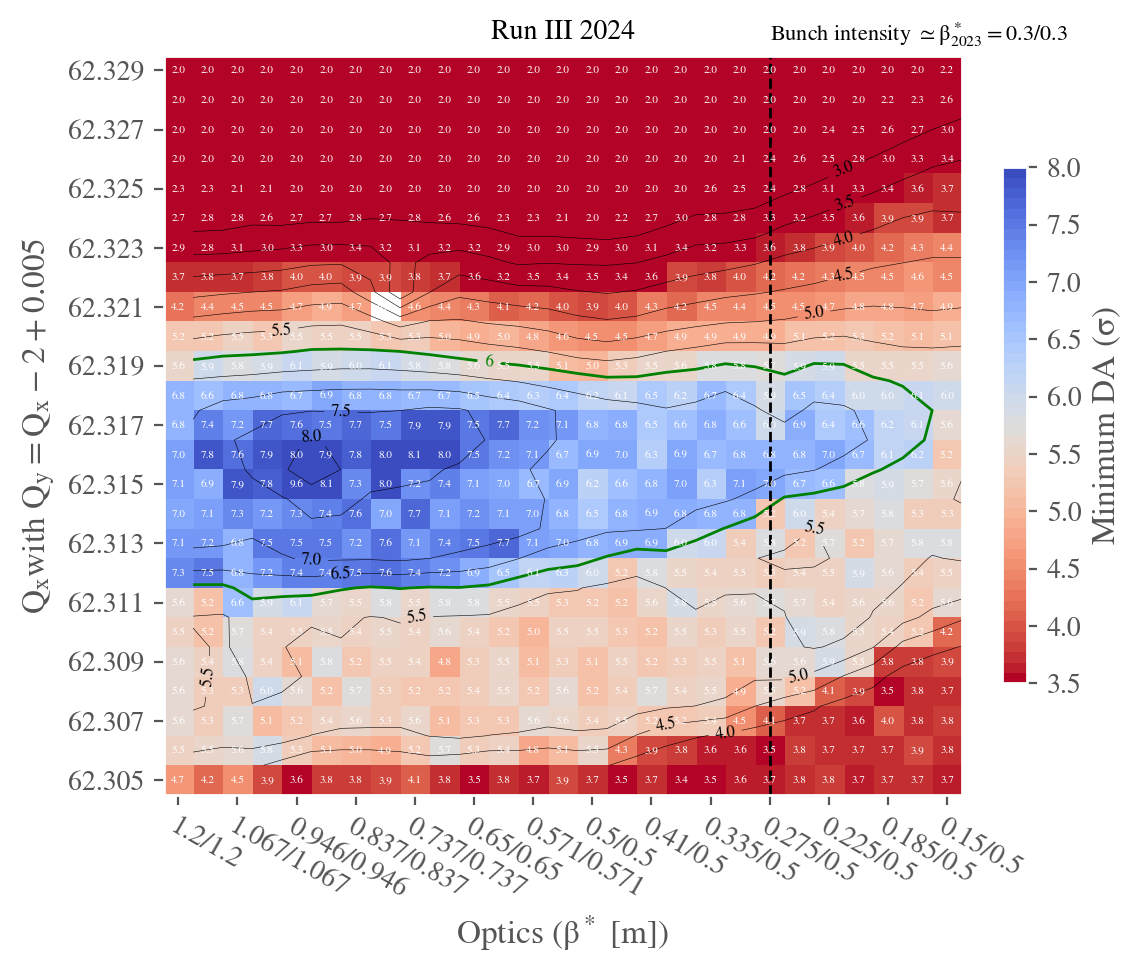

In [6]:
xlabel = "Optics (" + r"$\beta^*$" + " [m])"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    title="Run III 2024",
    add_vline=20,
)

In [17]:
path = "/home/HPC/cdroin/example_DA_study/master_study/scans/optics_tune_2024"

# Plot bunch intensity evolution with optics
n_optics = 27
n_tune = 25
mat_bunch_intensity = np.zeros((n_optics,n_tune))
mat_count = np.zeros((n_optics,n_tune))
for i in range(0,n_optics):
    path_collider = path + f"/collider_{i:02}"
    path_optics = path_collider + '/config.yaml'
    # with open(path_optics, 'r') as file:
    #     config_mad = yaml.safe_load(file)
    for job in range(0,200):
        path_job = path_collider + f"/xtrack_{job:04}/config.yaml"
        with open(path_job, 'r') as file:
            config_collider = yaml.safe_load(file)['config_collider']
        # Get bunch intensity
        try:
            bunch_intensity = config_collider['config_beambeam']['num_particles_per_bunch_after_optimization']   
            qx = config_collider['config_knobs_and_tuning']['qx']['lhcb1']
        except:
            continue
        idx_qx = int(qx * 1000 - 62305)
        mat_bunch_intensity[i,idx_qx ] += bunch_intensity
        mat_count[i,idx_qx ] += 1
        
mat_bunch_intensity = mat_bunch_intensity/mat_count
mat_bunch_intensity = mat_bunch_intensity.T 


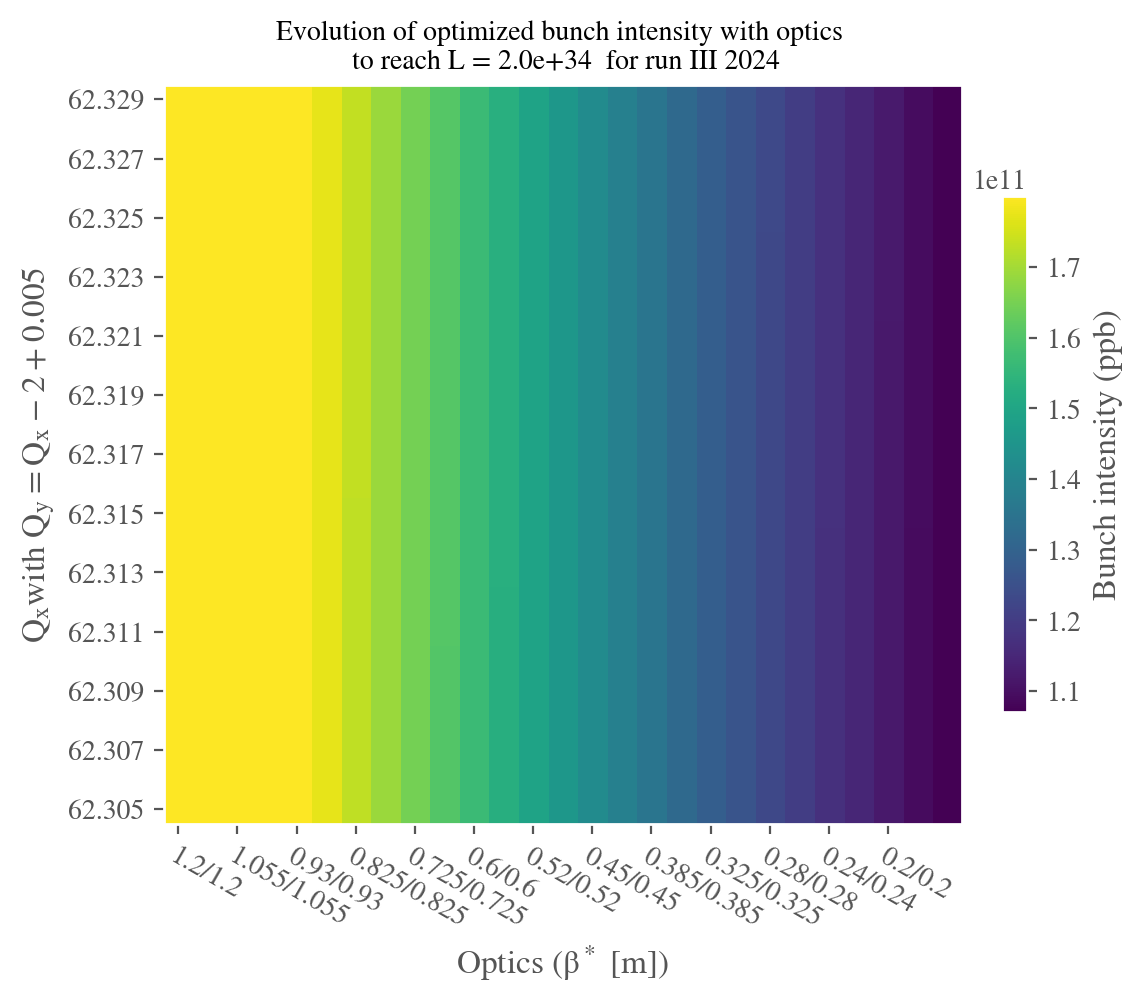

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(mat_bunch_intensity)
ax.invert_yaxis()

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0 - 0.5, mat_bunch_intensity.shape[1] - 0.5)
ax.set_ylim(0 - 0.5, mat_bunch_intensity.shape[0] - 0.5)


# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), rotation=-30, rotation_mode="anchor", ha="left"
)  

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.026, pad=0.04)
cbar.ax.set_ylabel("Bunch intensity (ppb)", rotation=90, va="bottom", labelpad=15)
plt.grid(visible=None)
    
ax.set_title("Evolution of optimized bunch intensity with optics \n to reach L = 2.0e+34  for run III 2024", fontsize=10)
plt.show()

## Run III 2023

In [9]:
# Define study
STUDY_NAME = "optics_tune_2023"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"

In [10]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)

df

name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.310        collider_00                             3.719   
      62.306 60.311        collider_00                             5.000   
      62.307 60.312        collider_00                             5.406   
      62.308 60.313        collider_00                             5.312   
      62.309 60.314        collider_00                             4.969   
...                                ...                               ...   
      62.325 60.330        collider_25                             2.000   
      62.326 60.331        collider_25                             2.000   
      62.327 60.332        collider_25                             2.000   
      62.328 60.333        collider_25                             2.000   
      62.329 60.334        collider_25                             2.000   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.310  62.305  60.310  15.0  15.0       411.0       410.0   
      62.306 60.311  62.306  60.311  15.0  15.0       411.0       410.0   
      62.307 60.312  62.307  60.312  15.0  15.0       411.0       410.0   
      62.308 60.313  62.308  60.313  15.0  15.0       411.0       410.0   
      62.309 60.314  62.309  60.314  15.0  15.0       411.0       410.0   
...                     ...     ...   ...   ...         ...         ...   
      62.325 60.330  62.325  60.330  15.0  15.0       411.0       410.0   
      62.326 60.331  62.326  60.331  15.0  15.0       411.0       410.0   
      62.327 60.332  62.327  60.332  15.0  15.0       411.0       410.0   
      62.328 60.333  62.328  60.333  15.0  15.0       411.0       410.0   
      62.329 60.334  62.329  60.334  15.0  15.0       411.0       410.0   

                     num_particles_per_bunch  
beam  qx     qy                               
lhcb1 62.305 60.310             1.150000e+11  
      62.306 60.311             1.150000e+11  
      62.307 60.312             1.150000e+11  
      62.308 60.313             1.150000e+11  
      62.309 60.314             1.150000e+11  
...                                      ...  
      62.325 60.330             1.150000e+11  
      62.326 60.331             1.150000e+11  
      62.327 60.332             1.150000e+11  
      62.328 60.333             1.150000e+11  
      62.329 60.334             1.150000e+11  

[624 rows x 9 columns]

In [11]:
# Reshape for plotting
df_to_plot = df.pivot(
    index="qx", columns="name base collider", values="normalized amplitude in xy-plane"
)
df_to_plot

name base collider,collider_00,collider_01,collider_02,collider_03,collider_04,collider_05,collider_06,collider_07,collider_08,collider_09,...,collider_16,collider_17,collider_18,collider_19,collider_20,collider_21,collider_22,collider_23,collider_24,collider_25
qx,,,,,,,,,,,,,,,,,,,,,
62.305,3.719,3.750,4.000,3.781,3.812,3.500,3.812,3.594,3.500,3.531,...,3.750,3.344,3.969,3.844,3.812,3.594,3.688,4.000,3.938,4.156
62.306,5.000,5.000,5.188,5.344,5.219,5.344,5.750,5.438,5.000,5.219,...,5.094,5.062,5.156,5.094,5.219,4.688,4.500,4.656,4.562,4.812
62.307,5.406,5.156,5.094,5.375,5.438,5.656,5.250,5.125,5.406,4.844,...,5.375,5.344,4.969,5.406,5.000,5.281,5.250,5.312,5.219,4.875
62.308,5.312,5.281,5.062,5.438,5.438,5.188,5.500,5.219,5.250,5.219,...,5.156,5.188,5.125,5.125,5.312,5.406,5.219,5.219,5.094,4.812
62.309,4.969,5.281,5.281,5.625,5.219,5.250,5.156,5.281,5.031,5.281,...,5.375,5.469,5.219,5.188,5.031,4.969,5.062,4.969,4.875,4.906
62.310,5.844,5.781,5.312,5.719,5.406,5.500,5.469,5.438,5.125,5.250,...,5.312,4.938,5.031,5.281,5.125,4.969,5.219,5.062,5.031,4.812
62.311,5.688,6.031,6.375,5.719,5.719,5.875,6.031,5.781,5.125,5.344,...,5.281,5.281,4.875,4.875,5.125,5.062,4.750,4.938,4.906,4.812
62.312,7.094,6.312,6.594,7.219,6.500,7.000,5.500,6.969,6.938,6.188,...,5.625,5.250,5.438,5.156,5.094,5.062,5.188,4.969,4.688,4.812
62.313,6.844,7.219,7.250,7.156,7.312,6.812,6.969,6.875,6.750,7.125,...,6.625,6.375,5.875,6.031,6.250,5.750,5.594,5.438,5.219,4.875


In [12]:
df_to_plot.columns

Index(['collider_00', 'collider_01', 'collider_02', 'collider_03',
       'collider_04', 'collider_05', 'collider_06', 'collider_07',
       'collider_08', 'collider_09', 'collider_11', 'collider_12',
       'collider_13', 'collider_14', 'collider_15', 'collider_16',
       'collider_17', 'collider_18', 'collider_19', 'collider_20',
       'collider_21', 'collider_22', 'collider_23', 'collider_24',
       'collider_25'],
      dtype='object', name='name base collider')

In [13]:
l_beta = [
    1.200,
    1.125,
    1.055,
    0.990,
    0.930,
    0.875,
    0.825,
    0.775,
    0.725,
    0.680,
    #0.640,
    0.600,
    0.560,
    0.520,
    0.485,
    0.450,
    0.415,
    0.385,
    0.355,
    0.325,
    0.300,
    0.280,
    0.260,
    0.240,
    0.220,
    0.200,
]
df_to_plot.columns = [str(beta) + "/"  + str(beta) for beta in l_beta]

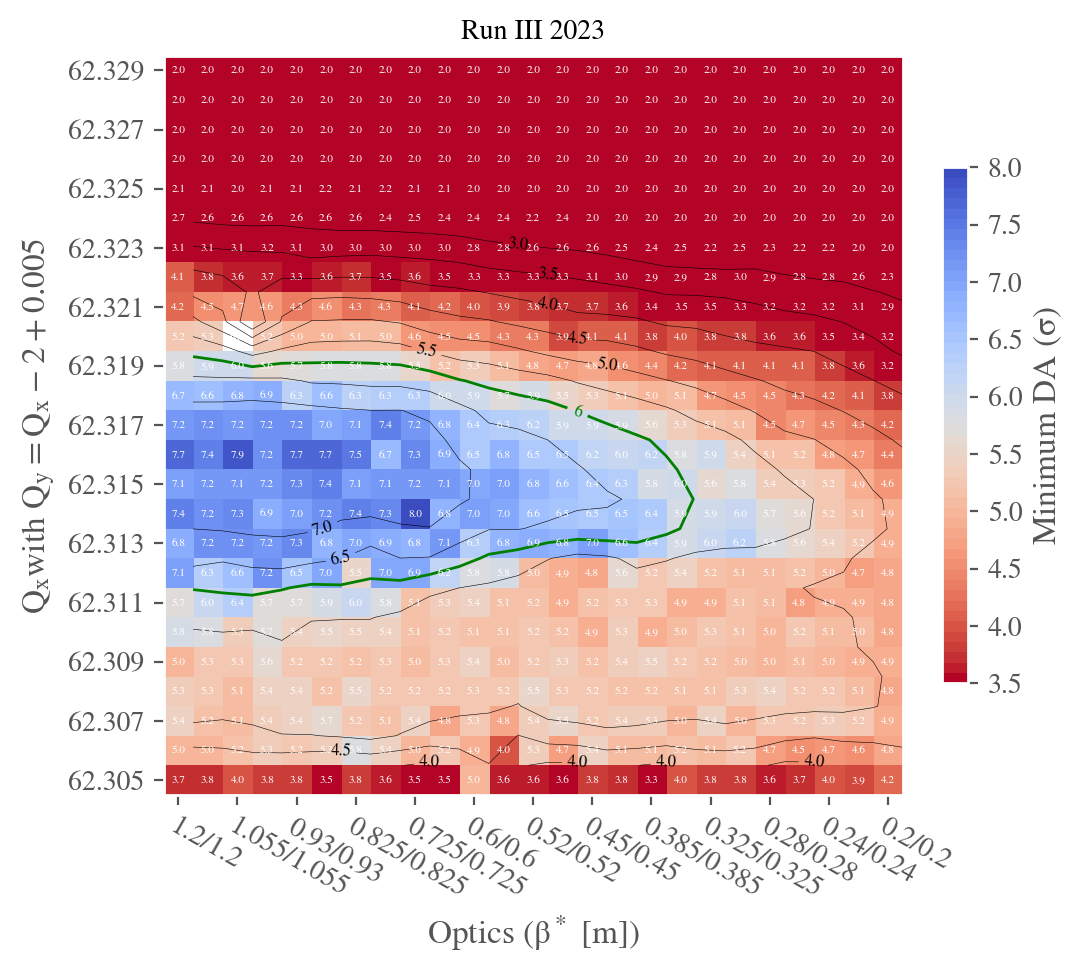

In [14]:
xlabel = "Optics (" + r"$\beta^*$" + " [m])"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    title="Run III 2023",
)

In [15]:
path = "/home/HPC/cdroin/example_DA_study/master_study/scans/optics_tune_2023"

# Plot bunch intensity evolution with optics
n_optics = 26
n_tune = 25
mat_bunch_intensity = np.zeros((n_optics,n_tune))
mat_count = np.zeros((n_optics,n_tune))
for i in range(0,n_optics):
    path_collider = path + f"/collider_{i:02}"
    path_optics = path_collider + '/config.yaml'
    # with open(path_optics, 'r') as file:
    #     config_mad = yaml.safe_load(file)
    for job in range(0,200):
        path_job = path_collider + f"/xtrack_{job:04}/config.yaml"
        with open(path_job, 'r') as file:
            config_collider = yaml.safe_load(file)['config_collider']
        # Get bunch intensity
        try:
            bunch_intensity = config_collider['config_beambeam']['num_particles_per_bunch_after_optimization']   
            qx = config_collider['config_knobs_and_tuning']['qx']['lhcb1']
        except:
            continue
        idx_qx = int(qx * 1000 - 62305)
        mat_bunch_intensity[i,idx_qx ] += bunch_intensity
        mat_count[i,idx_qx ] += 1
        
mat_bunch_intensity = mat_bunch_intensity/mat_count
mat_bunch_intensity = mat_bunch_intensity.T 

# Delete empty column
mat_bunch_intensity = np.delete(mat_bunch_intensity, 10, 1)

/tmp/ipykernel_56473/2582349499.py:27: RuntimeWarning: invalid value encountered in divide
  mat_bunch_intensity = mat_bunch_intensity/mat_count


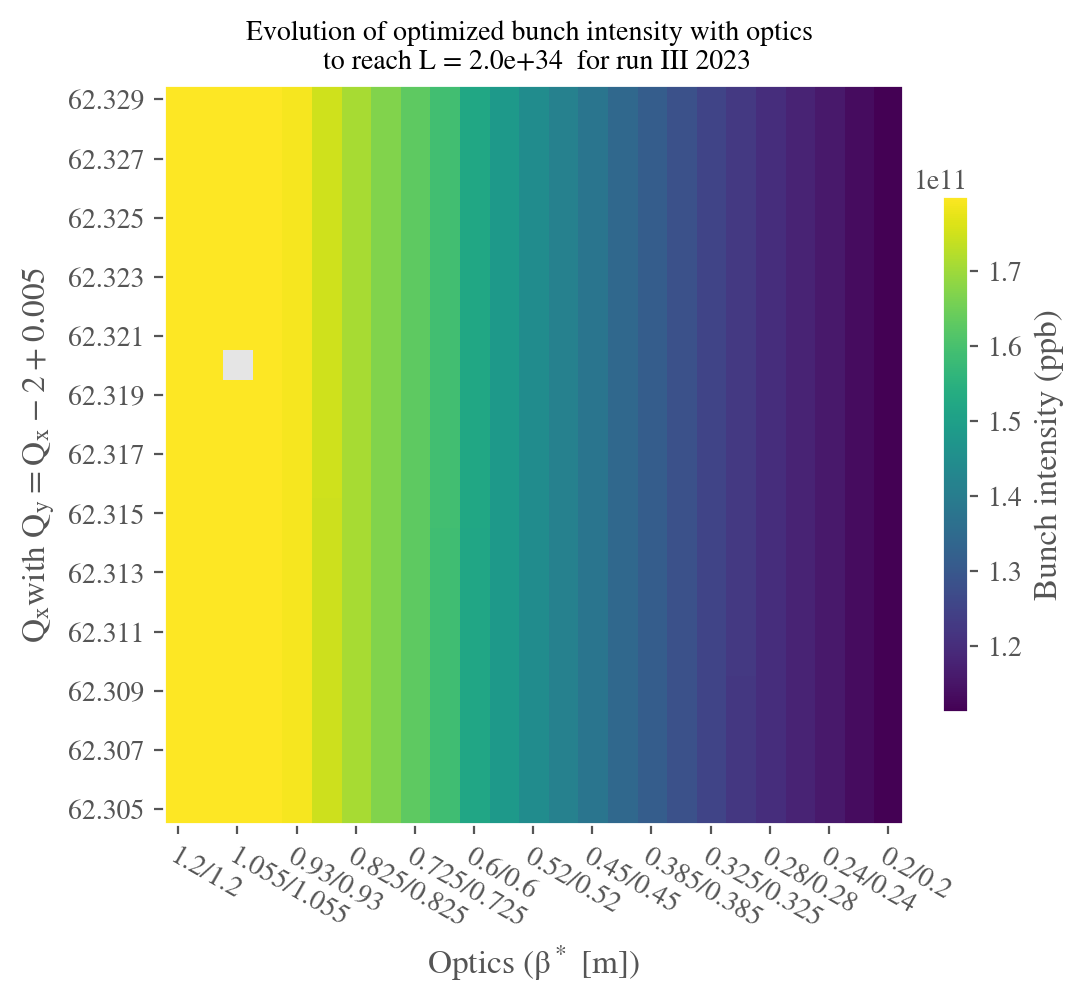

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(mat_bunch_intensity)
ax.invert_yaxis()

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0 - 0.5, mat_bunch_intensity.shape[1] - 0.5)
ax.set_ylim(0 - 0.5, mat_bunch_intensity.shape[0] - 0.5)


# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), rotation=-30, rotation_mode="anchor", ha="left"
)  

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.026, pad=0.04)
cbar.ax.set_ylabel("Bunch intensity (ppb)", rotation=90, va="bottom", labelpad=15)
plt.grid(visible=None)
    
ax.set_title("Evolution of optimized bunch intensity with optics \n to reach L = 2.0e+34  for run III 2023", fontsize=10)
plt.show()